# Import the necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('max_columns', None)

import warnings
warnings.filterwarnings('ignore')

# Read the dataset

In [2]:
input_data = pd.read_csv('Leads.csv')

# Check the size and data type of the data

In [3]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# ------------------------------------------------------------

# Check the Data Distribution of numeric datatypes and outliers

In [4]:
input_data.describe(percentiles=[.0,.01,.02,.03,.04,.05,.25,.50,.75,.95,.96,.97,.98,.99,1])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
0%,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
1%,580317.120000,0.000000,0.000000,0.000000,0.000000,10.000000,13.000000
2%,580938.560000,0.000000,0.000000,0.000000,0.000000,11.000000,13.000000
3%,581639.340000,0.000000,0.000000,0.000000,0.000000,11.000000,13.000000
4%,582279.080000,0.000000,0.000000,0.000000,0.000000,12.000000,13.000000
5%,582869.900000,0.000000,0.000000,0.000000,0.000000,12.000000,14.000000


# ------------------------------------------------------------

# Checking the preview of data and columns

In [5]:
input_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
input_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# ------------------------------------------------------------

# Data Cleaning & EDA

# Check the value share in % for each columns

In [7]:
for each in input_data.columns[2:]:
    print()
    print('Columns: ', each)
    print(input_data[each].value_counts(normalize=True))
    print()


Columns:  Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64


Columns:  Lead Source
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Live Chat            0.000217
Social Media         0.000217
WeLearn              0.000109
welearnblog_Home     0.000109
Pay per Click Ads    0.000109
blog                 0.000109
testone              0.000109
youtubechannel       0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64


Columns:  Do Not Email
No     0.920563
Yes    0.079437
Name: Do Not Email

## Dropping the skewed columns which has same value with a huge share (useless)

In [8]:
cols_to_drop = ['Do Not Email', 'Do Not Call', 'What matters most to you in choosing a course', 'Search',
                'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement',
                'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                'Get updates on DM Content', 'I agree to pay the amount through cheque']

In [9]:
input_data.drop(cols_to_drop,axis=1,inplace=True)

In [10]:
for each in input_data.columns[2:]:
    print()
    print('Columns: ', each)
    print(input_data[each].value_counts(normalize=True))
    print()


Columns:  Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64


Columns:  Lead Source
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Live Chat            0.000217
Social Media         0.000217
WeLearn              0.000109
welearnblog_Home     0.000109
Pay per Click Ads    0.000109
blog                 0.000109
testone              0.000109
youtubechannel       0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64


Columns:  Converted
0    0.61461
1    0.38539
Name: Converted, dtype: flo

Name: Asymmetrique Activity Score, dtype: float64


Columns:  Asymmetrique Profile Score
15.0    0.350259
18.0    0.213262
16.0    0.119275
17.0    0.115293
20.0    0.061330
19.0    0.048785
14.0    0.045002
13.0    0.040621
12.0    0.004381
11.0    0.001792
Name: Asymmetrique Profile Score, dtype: float64


Columns:  A free copy of Mastering The Interview
No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64


Columns:  Last Notable Activity
Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
View in browser link Clicked    0.000108
Form Submitted on Webs

In [11]:
input_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Tags', 'Lead Quality', 'Lead Profile', 'City',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

# ------------------------------------------------------------

# Replace "Select" with "Nan"

In [12]:
input_data.replace('Select',np.nan,inplace=True)

In [13]:
for each in input_data.columns[2:]:
    print()
    print('Columns: ', each)
    print(input_data[each].value_counts(normalize=True))
    print()


Columns:  Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64


Columns:  Lead Source
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Live Chat            0.000217
Social Media         0.000217
WeLearn              0.000109
welearnblog_Home     0.000109
Pay per Click Ads    0.000109
blog                 0.000109
testone              0.000109
youtubechannel       0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64


Columns:  Converted
0    0.61461
1    0.38539
Name: Converted, dtype: flo

# ------------------------------------------------------------

# Checking the Missing value %

In [14]:
round(input_data.isnull().mean()*100,2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Country                                   26.63
Specialization                            36.58
How did you hear about X Education        78.46
What is your current occupation           29.11
Tags                                      36.29
Lead Quality                              51.59
Lead Profile                              74.19
City                                      39.71
Asymmetrique Activity Index               45.65
Asymmetrique Profile Index                45.65
Asymmetrique Activity Score               45.65
Asymmetrique Profile Score              

# ------------------------------------------------------------

# Dropping the columns with missing value > 40% 

In [15]:
cols_to_remove = ['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
                  'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
                  'Asymmetrique Profile Score']

In [16]:
input_data.drop(cols_to_remove, axis=1, inplace=True)

In [17]:
round(input_data.isnull().mean()*100,2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Country                                   26.63
Specialization                            36.58
What is your current occupation           29.11
Tags                                      36.29
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

# ------------------------------------------------------------

# Missing Value Imputation (Categorical)
> - ###  when the distribution is skewed, we can use MODE (most repeated value)
> - ### when the distribution is almost evenly distributed, we can use "others" as a new category to impute missing values.

### Column : Lead Source (0.39%)

In [18]:
input_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
WeLearn                 1
welearnblog_Home        1
Pay per Click Ads       1
blog                    1
testone                 1
youtubechannel          1
NC_EDM                  1
Name: Lead Source, dtype: int64

### Column : Country (26.63%)

In [19]:
input_data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Germany                    4
Nigeria                    4
South Africa               4
Canada                     4
Sweden                     3
Italy                      2
Philippines                2
Ghana                      2
Netherlands                2
Uganda                     2
Asia/Pacific Region        2
China                      2
Belgium                    2
Bangladesh                 2
Switzerland                1
Liberia                    1
Tanzania                   1
Indonesia                  1
Russia                     1
Denmark                    1
Vietnam       

### Column : Specialization (36.58%)

In [20]:
input_data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

### Column : What is your current occupation (29.11%)

In [21]:
input_data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

### Column : Tags (36.29%)

In [22]:
input_data['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

### Column : City (39.71%)

In [23]:
input_data['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

# ------------------------------------------------------------

## The missing values for "Lead Source", "Specialization" and "Tags" are replaced with new category "Others"

In [24]:
input_data['Lead Source'].fillna('others',inplace=True)
input_data['Specialization'].fillna('others',inplace=True)
input_data['Tags'].fillna('others',inplace=True)

# ------------------------------------------------------------

## The missing values for "Country", "What is your current occupation" and "City" are replaced with the mode of the respective columns.

In [25]:
input_data['Country'].fillna(input_data['Country'].mode()[0],inplace=True)
input_data['What is your current occupation'].fillna(input_data['What is your current occupation'].mode()[0],inplace=True)
input_data['City'].fillna(input_data['City'].mode()[0],inplace=True)

In [26]:
round(input_data.isnull().mean()*100,2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Country                                   0.00
Specialization                            0.00
What is your current occupation           0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

# ------------------------------------------------------------

## Dropping the other missing values(respective records) which is of negligible %

In [27]:
input_data.dropna(inplace=True)

# ------------------------------------------------------------

## Dropping the duplicate records if there was any

In [28]:
input_data.drop_duplicates(inplace=True)

# ------------------------------------------------------------

# Checking the distribution and outliers for numerical columns

### Columns : TotalVisits

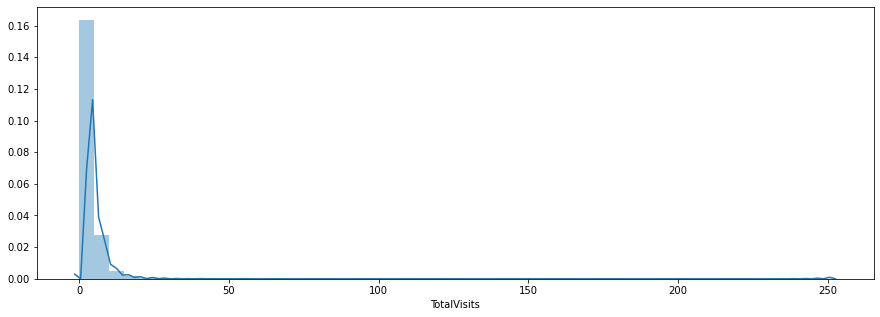

In [29]:
plt.figure(figsize=(15,5))
sns.distplot(input_data['TotalVisits'])

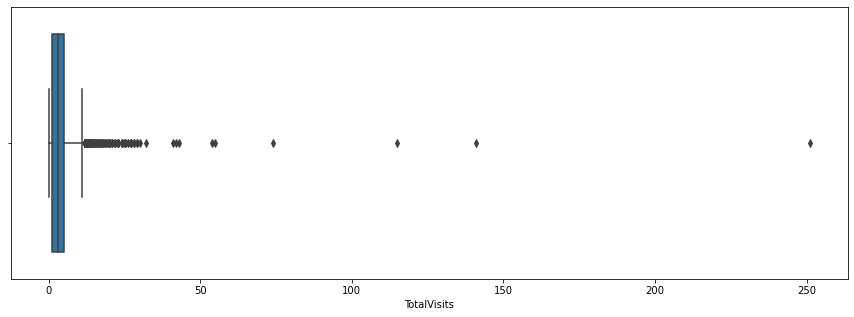

In [30]:
plt.figure(figsize=(15,5))
sns.boxplot(input_data['TotalVisits'])w

### Columns : Total Time Spent on Website

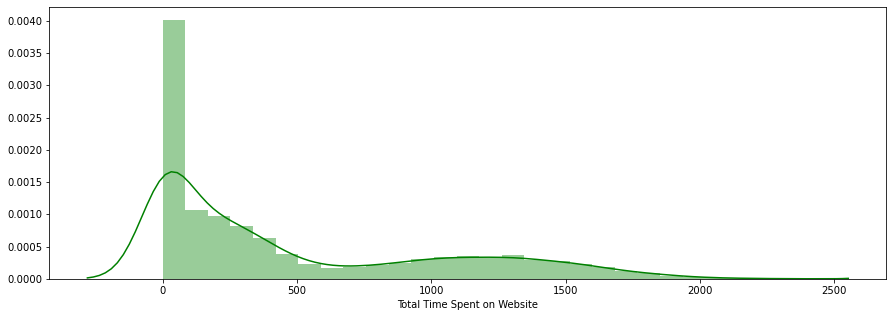

In [31]:
plt.figure(figsize=(15,5))
sns.distplot(input_data['Total Time Spent on Website'],color='green')

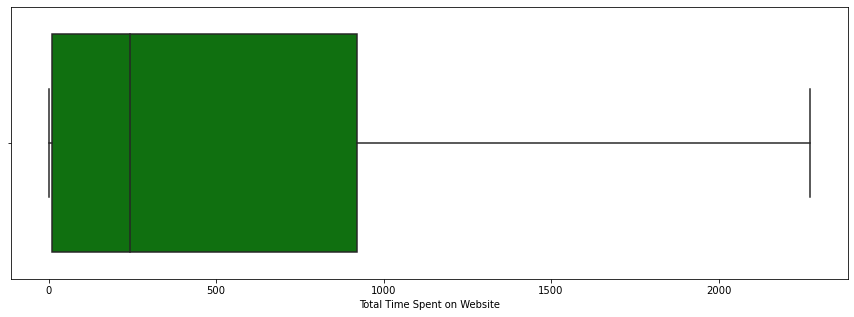

In [32]:
plt.figure(figsize=(15,5))
sns.boxplot(input_data['Total Time Spent on Website'], color='green')

### Columns : Page Views Per Visit

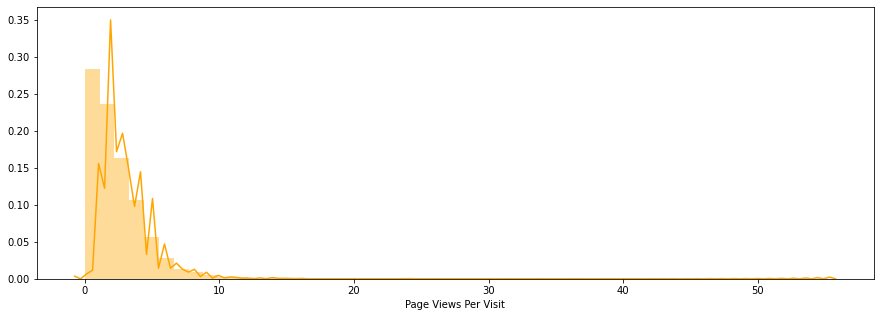

In [33]:
plt.figure(figsize=(15,5))
sns.distplot(input_data['Page Views Per Visit'],color='orange')

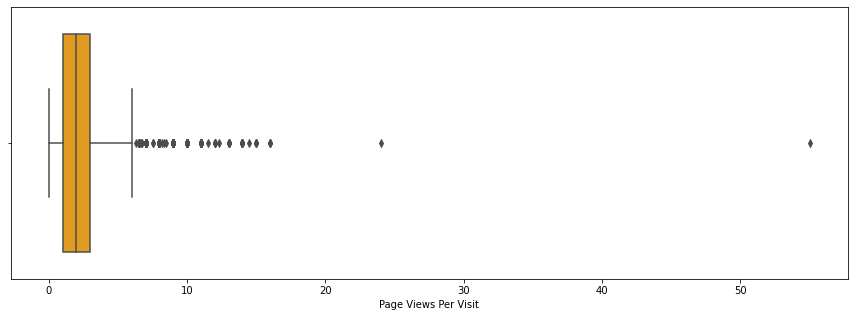

In [34]:
plt.figure(figsize=(15,5))
sns.boxplot(input_data['Page Views Per Visit'], color='orange')

## Observation : Found outliers on the columns TotalVisits and Page Views Per Visit

# ------------------------------------------------------------

# Outlier treatments are subjective 
> Usual method :
-  should be greater than Q1 - (1.5 * IQR)
-  should be lesser than Q3 + (1.5 * IQR)

> Used method below :
-  should be greater than percentile(10%) - (1.5 * IQR)
-  should be lesser than percentile(80%) + (1.5 * IQR)

- Focused more on the positive outliers

In [35]:
for each_col in ['TotalVisits', 'Page Views Per Visit']:
    lower_limit = input_data[each_col].quantile(0.10)
    higher_limit = input_data[each_col].quantile(0.80)
    iqr = higher_limit-lower_limit
    input_data = input_data[(input_data[each_col] > lower_limit-(1.5*iqr)) & (input_data[each_col] < higher_limit+(1.5*iqr))]

# ------------------------------------------------------------

## Checking the outliers again

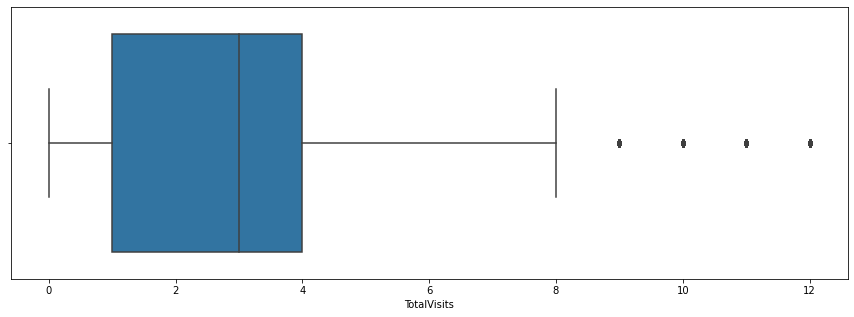

In [36]:
plt.figure(figsize=(15,5))
sns.boxplot(input_data['TotalVisits'])

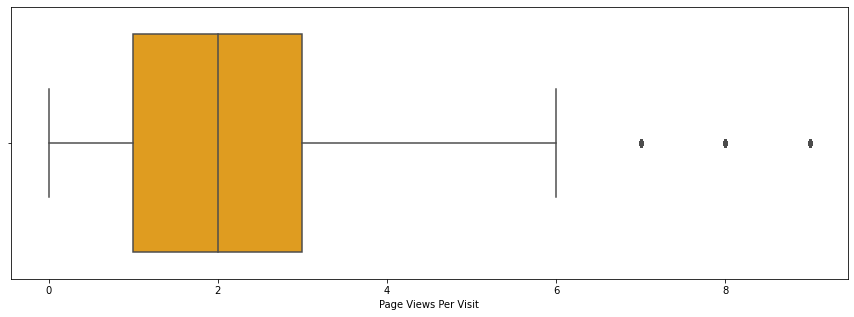

In [37]:
plt.figure(figsize=(15,5))
sns.boxplot(input_data['Page Views Per Visit'], color='orange')

# ------------------------------------------------------------

# Drop Junk Values. 

### As per the explanation 
- Closed by Horizzon
- Lost to EINS
### the above 2 features means that the leads are lost or closed by the competitors but the data says that these leads are converted (1), So Dropping these features because of the discrepancies.


- Lost to Others <br>
has minimal records and are useless

In [38]:
input_data[input_data['Tags'] == 'Closed by Horizzon']['Converted'].value_counts()

1    282
0      2
Name: Converted, dtype: int64

In [39]:
input_data[input_data['Tags'] == 'Lost to Others']['Converted'].value_counts()

0    7
Name: Converted, dtype: int64

In [40]:
input_data[input_data['Tags'] == 'Lost to EINS']['Converted'].value_counts()

1    164
0      4
Name: Converted, dtype: int64

In [41]:
input_data = input_data[~input_data['Tags'].isin(['Closed by Horizzon','Lost to Others','Lost to EINS'])]

# ------------------------------------------------------------

## Label Encode : Lets see How Label Encoding works for the categorical values

In [42]:
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()

In [43]:
input_data_copy = input_data.copy()
categorical_cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization',
                   'What is your current occupation', 'Tags', 'City', 'A free copy of Mastering The Interview',
                   'Last Notable Activity']
for each_col in categorical_cols:
    input_data_copy[each_col] = lbl_enc.fit_transform(input_data_copy[each_col])

## check the relationship between features post label encoding

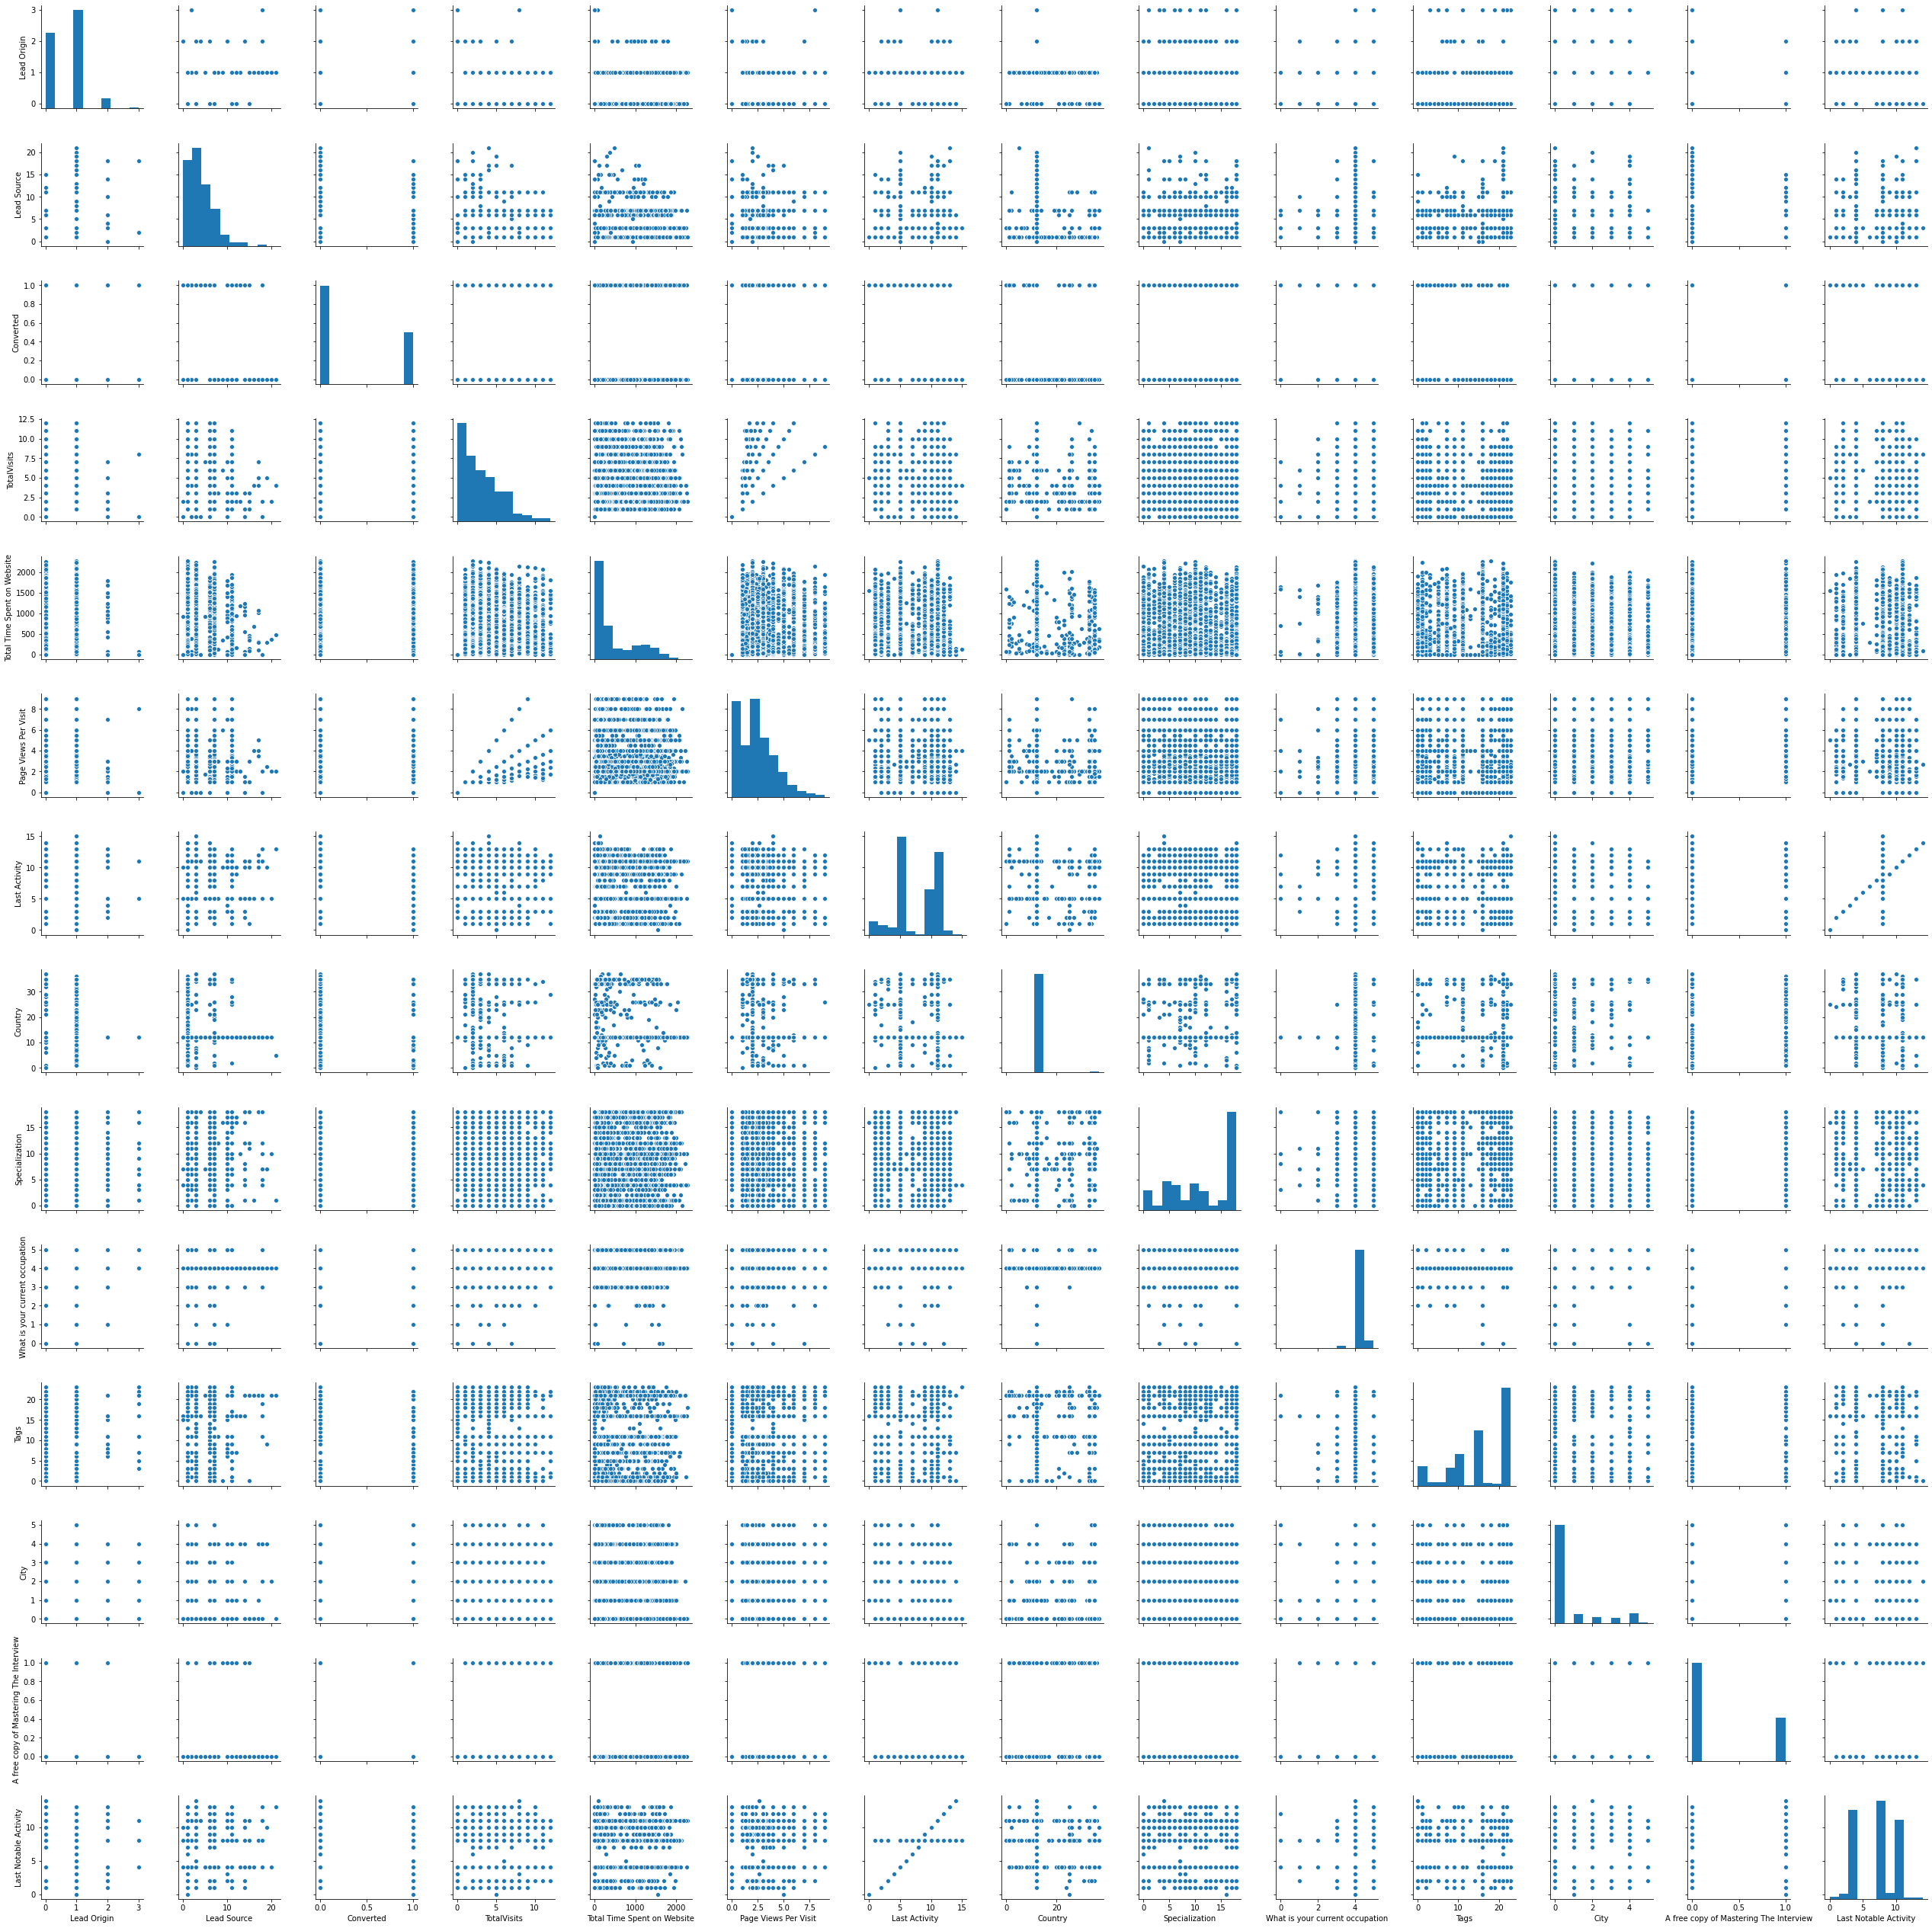

In [44]:
sns.pairplot(input_data_copy.drop(['Prospect ID', 'Lead Number'], axis=1))

## Observation : No significance relationship observed between features and target

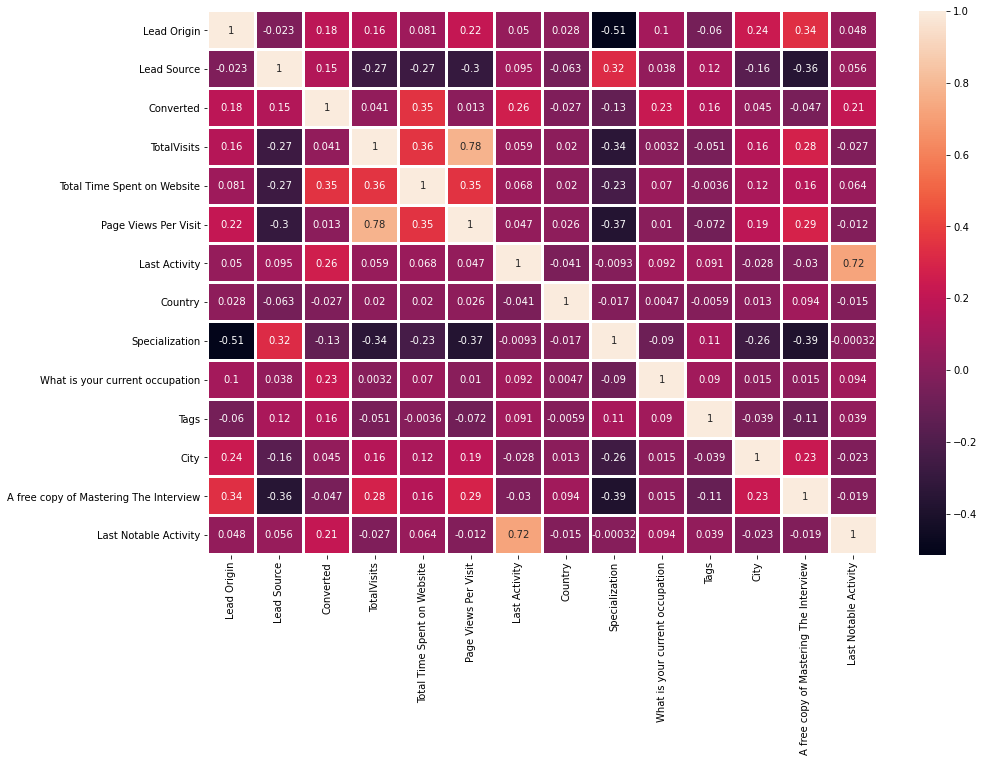

In [45]:
plt.figure(figsize=(15,10))
sns.heatmap(input_data_copy[input_data_copy.columns[2:]].corr(), annot=True, linewidths=2)

### Observation : Again "No" significance Correlation score observed between features and target

# ------------------------------------------------------------

## One Hot Encoding

In [46]:
categorical_cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization',
                   'What is your current occupation', 'Tags', 'City', 'A free copy of Mastering The Interview',
                   'Last Notable Activity']
for each_col in categorical_cols:
    input_data = pd.concat([input_data, pd.get_dummies(input_data[each_col], prefix=each_col, drop_first=True)],axis = 1,)
    input_data.drop([each_col], axis=1,inplace=True)

# Okay the data is ready and lets do other stuffs to train the model

# ------------------------------------------------------------

## Split the data to train & test

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x = input_data.drop(['Converted'], axis=1)
y = input_data['Converted']

In [49]:
x_train_full, x_test_full, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [50]:
x_train = x_train_full.drop(['Prospect ID', 'Lead Number'], axis=1)
x_test = x_test_full.drop(['Prospect ID', 'Lead Number'], axis=1)

## Scale the data  (only the numeric data)

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()

In [53]:
numeric_cols = ['TotalVisits', 'Page Views Per Visit','Total Time Spent on Website']

In [54]:
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)

In [55]:
x_test_scaled = pd.DataFrame(scaler.fit_transform(x_test), columns=x_train.columns)

## Lets Check the features that doesn't contribute to the model using p-value

In [56]:
import statsmodels.api as sm

In [57]:
log_stats_mdl = sm.GLM(np.array(y_train).reshape(-1,1), sm.add_constant(x_train_scaled), family=sm.families.Binomial())

In [58]:
log_stats_mdl.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6700
Model:                            GLM   Df Residuals:                     6562
Model Family:                Binomial   Df Model:                          137
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1249.5
Date:                Mon, 08 Mar 2021   Deviance:                       2499.0
Time:                        22:21:48   Pearson chi2:                 2.18e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     40.7915   3.09e+05      0.000      1.000   -6.05e+05    6.05e+05
TotalVisits                                                1.3713      0.404      3.391      0.001       0.579       2.164
Total Time Spent on Website                                4.4546      0.260     17.118      0.000       3.945       4.965
Page Views Per Visit                                      -1.0946      0.459     -2.387      0.017      -1.993      -0.196
Lead Origin_Landing Page Submission                       -0.5359      0.236     -2.271      0.023      -0.998      -0.073
Lead Origin_Lead Add Form                                 -0.4867      1.836     -0.265      0.791      -4.086       3.112
Lead Origin_Lead Import                                    0.1923      2.394      0.080      0.936      -4.500       4.885
Lead Source_Direct Traffic                                -0.6881      4.698     -0.146      0.884      -9.896       8.520
Lead Source_Facebook                                       0.1923      2.394      0.080      0.936      -4.500       4.885
Lead Source_Google                                        -0.6331      4.696     -0.135      0.893      -9.836       8.570
Lead Source_Live Chat                                     20.8195   1.55e+05      0.000      1.000   -3.04e+05    3.04e+05
Lead Source_NC_EDM                                        25.3485    2.1e+05      0.000      1.000   -4.12e+05    4.12e+05
Lead Source_Olark Chat                                     0.5175      4.698      0.110      0.912      -8.690       9.725
Lead Source_Organic Search                                -0.6736      4.698     -0.143      0.886      -9.882       8.535
Lead Source_Pay per Click Ads                            -19.7163   2.15e+05  -9.17e-05      1.000   -4.21e+05    4.21e+05
Lead Source_Press_Release                                -18.7845   2.13e+05  -8.81e-05      1.000   -4.18e+05    4.18e+05
Lead Source_Reference                                      1.0770      4.347      0.248      0.804      -7.443       9.597
Lead Source_Referral Sites                                -1.1787      4.718     -0.250      0.803     -10.425       8.068
Lead Source_Social Media                                   1.7359      7.581      0.229      0.819     -13.122      16.594
Lead Source_WeLearn                                       20.5792   2.15e+05   9.56e-05      1.000   -4.22e+05    4.22e+05
Lead Source_Welingak Website                               5.2350      4.393      1.192      0.233      -3.375      13.845
Lead Source_bing                                           0.4197      4.931      0.085      0.932      -9.244      10.083
Lead Sou

# ------------------------------------------------------------

## Remove the features that has p-value as 1 and z value away from the mean or at the corners

In [59]:
cols_to_drop_glm = ['Last Notable Activity_View in browser link Clicked','Last Notable Activity_Unsubscribed',
                   'Last Notable Activity_Unreachable','Last Notable Activity_SMS Sent','Last Notable Activity_Had a Phone Conversation',
                   'Last Notable Activity_Email Opened', 'Last Notable Activity_Email Marked Spam','Last Notable Activity_Email Bounced',
                   'Tags_Recognition issue (DEC approval)', 'Country_United States', 'Country_United Kingdom', 'Country_Singapore',
                   'Country_Oman','Country_Germany','Country_Denmark','Last Activity_Visited Booth in Tradeshow', 'Last Activity_Email Received',
                   'Lead Source_testone','Lead Source_WeLearn', 'Lead Source_Pay per Click Ads','Lead Source_Press_Release']

In [60]:
x_train_scaled.drop(cols_to_drop_glm, axis=1, inplace=True)

log_stats_mdl = sm.GLM(np.array(y_train).reshape(-1,1), sm.add_constant(x_train_scaled), family=sm.families.Binomial())
log_stats_mdl.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6700
Model:                            GLM   Df Residuals:                     6579
Model Family:                Binomial   Df Model:                          120
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 08 Mar 2021   Deviance:                          nan
Time:                        22:21:52   Pearson chi2:                 3.74e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   1.206e+15   6.11e+07   1.97e+07      0.000    1.21e+15    1.21e+15
TotalVisits                                             4.869e+14   6.67e+06    7.3e+07      0.000    4.87e+14    4.87e+14
Total Time Spent on Website                             2.362e+15   4.22e+06   5.59e+08      0.000    2.36e+15    2.36e+15
Page Views Per Visit                                   -4.993e+14   7.08e+06  -7.06e+07      0.000   -4.99e+14   -4.99e+14
Lead Origin_Landing Page Submission                    -1.234e+14   3.38e+06  -3.65e+07      0.000   -1.23e+14   -1.23e+14
Lead Origin_Lead Add Form                               2.764e+14   3.82e+07   7.24e+06      0.000    2.76e+14    2.76e+14
Lead Origin_Lead Import                                -2.367e+14   1.83e+07  -1.29e+07      0.000   -2.37e+14   -2.37e+14
Lead Source_Direct Traffic                             -9.657e+14   3.39e+07  -2.85e+07      0.000   -9.66e+14   -9.66e+14
Lead Source_Facebook                                   -2.367e+14   1.83e+07  -1.29e+07      0.000   -2.37e+14   -2.37e+14
Lead Source_Google                                     -9.417e+14   3.39e+07  -2.78e+07      0.000   -9.42e+14   -9.42e+14
Lead Source_Live Chat                                   2.034e+15   6.15e+07   3.31e+07      0.000    2.03e+15    2.03e+15
Lead Source_NC_EDM                                      4.324e+15   7.53e+07   5.74e+07      0.000    4.32e+15    4.32e+15
Lead Source_Olark Chat                                 -3.397e+14    3.4e+07  -9.99e+06      0.000    -3.4e+14    -3.4e+14
Lead Source_Organic Search                             -9.104e+14    3.4e+07  -2.68e+07      0.000    -9.1e+14    -9.1e+14
Lead Source_Reference                                  -7.752e+14   3.91e+07  -1.98e+07      0.000   -7.75e+14   -7.75e+14
Lead Source_Referral Sites                             -1.207e+15   3.46e+07  -3.49e+07      0.000   -1.21e+15   -1.21e+15
Lead Source_Social Media                               -9.953e+14   5.85e+07   -1.7e+07      0.000   -9.95e+14   -9.95e+14
Lead Source_Welingak Website                            3.935e+14   3.97e+07   9.91e+06      0.000    3.94e+14    3.94e+14
Lead Source_bing                                       -1.045e+15   4.53e+07  -2.31e+07      0.000   -1.05e+15   -1.05e+15
Lead Source_blog                                       -4.205e+15   7.53e+07  -5.58e+07      0.000    -4.2e+15    -4.2e+15
Lead Source_google                                     -3.062e+15   4.79e+07  -6.39e+07      0.000   -3.06e+15   -3.06e+15
Lead Source_others                                      1.172e+14   4.15e+07   2.82e+06      0.000    1.17e+14    1.17e+14
Lead Sou

# ------------------------------------------------------------

# Lets use RFE to choose the top 20 features which are relavant

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
log_mdl = LogisticRegression()

In [63]:
from sklearn.feature_selection import RFE

In [64]:
rfe = RFE(log_mdl,20)

In [65]:
rfe.fit(x_train_scaled, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [66]:
rfe_rank = pd.DataFrame(zip(x_train_scaled.columns, rfe.support_, rfe.ranking_), columns=['cols','support','rank'])

In [67]:
rfe_rank

,cols,support,rank
0,TotalVisits,False,11
1,Total Time Spent on Website,True,1
2,Page Views Per Visit,False,9
3,Lead Origin_Landing Page Submission,False,16
4,Lead Origin_Lead Add Form,False,4
...,...,...,...
119,Last Notable Activity_Email Received,False,96
120,Last Notable Activity_Form Submitted on Website,False,55
121,Last Notable Activity_Modified,True,1
122,Last Notable Activity_Olark Chat Conversation,True,1


# ------------------------------------------------------------

# Lets pick the top 20 features which has RFE support True and RFE Rank 1

In [68]:
top_20_features = list(rfe_rank.sort_values(['rank']).head(20)['cols'])
top_20_features

['Lead Source_Referral Sites',
 'Last Notable Activity_Olark Chat Conversation',
 'Tags_Busy',
 'Last Activity_Email Bounced',
 'Tags_Interested in Next batch',
 'Tags_Lateral student',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Tags_in touch with EINS',
 'Lead Source_Welingak Website',
 'Tags_invalid number',
 'Lead Source_Organic Search',
 'Last Activity_SMS Sent',
 'Tags_others',
 'Tags_switched off',
 'Lead Source_Google',
 'Tags_wrong number given',
 'Total Time Spent on Website',
 'Lead Source_Direct Traffic',
 'Last Notable Activity_Modified']

# ------------------------------------------------------------

# Now, Lets quickly check for the VIF score to remove multicollinearity

In [69]:
x_train_scaled_rfe = x_train_scaled[top_20_features]

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['cols'] = x_train_scaled_rfe.columns
vif['vif_score'] = [variance_inflation_factor(x_train_scaled_rfe.values, i) for i in range(x_train_scaled_rfe.shape[1])]

In [71]:
vif.sort_values(['vif_score'], ascending=False)

,cols,vif_score
17,Total Time Spent on Website,2.479571
15,Lead Source_Google,2.343825
18,Lead Source_Direct Traffic,2.078224
13,Tags_others,1.887296
7,Tags_Will revert after reading the email,1.843569
12,Last Activity_SMS Sent,1.716140
19,Last Notable Activity_Modified,1.512612
11,Lead Source_Organic Search,1.511207
6,Tags_Ringing,1.448102
3,Last Activity_Email Bounced,1.117242


## Observation : The scores are pretty decent and no correlation found between features

# ------------------------------------------------------------

# Let's Build the Logistic Regression Model 

In [72]:
log_mdl.fit(x_train_scaled[top_20_features], y_train)

LogisticRegression()

In [73]:
y_pred = log_mdl.predict(x_test_scaled[top_20_features])
y_pred_train = log_mdl.predict(x_train_scaled[top_20_features])

In [74]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score,recall_score

### Test Recall Score

In [75]:
recall_score(y_test, y_pred)

0.8646003262642741

### Test Precision Score

In [76]:
precision_score(y_test,y_pred)

0.9314586994727593

### Train Recall Score

In [77]:
recall_score(y_train, y_pred_train)

0.8557650153441473

### Test Precision Score

In [78]:
precision_score(y_train, y_pred_train)

0.9255571360834519

# Confusion Matric and classification Report (only on test data)

In [79]:
from sklearn.metrics import confusion_matrix, classification_report

In [80]:
confusion_matrix(y_test,y_pred)

array([[1024,   39],
       [  83,  530]])

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1063
           1       0.93      0.86      0.90       613

    accuracy                           0.93      1676
   macro avg       0.93      0.91      0.92      1676
weighted avg       0.93      0.93      0.93      1676



# Auc-Roc Score (only on test data)

In [82]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9139558545714597

# ------------------------------------------------------------

# Feature Importance or coefficients

In [83]:
pd.DataFrame(log_mdl.coef_.reshape(-1,1), index=top_20_features, columns=['Coefficients']).sort_values(['Coefficients'], ascending=False)

,Coefficients
Tags_Will revert after reading the email,6.207466
Total Time Spent on Website,3.865871
Lead Source_Welingak Website,3.129140
Tags_Busy,2.100997
Last Activity_SMS Sent,1.955803
Tags_Lateral student,1.718531
Tags_others,1.550068
Tags_in touch with EINS,1.241696
Tags_Interested in Next batch,1.078165
Last Activity_Email Bounced,-1.046988


# ------------------------------------------------------------

# Converting Prediction probability into a score between 0 - 100

In [84]:
x_test_final = x_test_scaled[top_20_features]

In [85]:
x_test_final['lead_num']= x_test_full['Lead Number'].reset_index()['Lead Number']

In [86]:
x_test_final['lead_pred'] = y_pred

In [87]:
x_test_final['lead_pred_prob'] = log_mdl.predict_proba(x_test_scaled[top_20_features])[:,1]

In [88]:
x_test_final['lead_pred_prob'] = round(x_test_final['lead_pred_prob']*100,2)

In [89]:
pd.set_option('max_rows', None)
x_test_final[['lead_num','lead_pred','lead_pred_prob']].sort_values(['lead_pred_prob'],ascending = False)

,lead_num,lead_pred,lead_pred_prob
837,601868,1,99.96
269,630200,1,99.95
289,641173,1,99.94
335,608835,1,99.93
603,639056,1,99.93
1284,608183,1,99.92
468,628916,1,99.92
622,601618,1,99.92
952,608709,1,99.92
1541,647404,1,99.91


# Conclusion : This is the final result expected having the highet probability(hot leads) at the top to pick or focus (who gets converted)